In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')

In [3]:
df = pd.read_csv("skoda.csv")

In [4]:
def unique_val_count(data, column):
    
    #counting the unique falue
    df_count = data[column].value_counts()
    
    #Taking into dataframe
    df_count = pd.DataFrame(df_count)
    
    #Resettng index    
    df_count = df_count.reset_index()
    
    #Renaming columns 
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    
    #Introducing new column for %
    df_count['% of cars'] = np.round((df_count['No_of_cars']/df_count['No_of_cars'].sum()*100), 2)
    
    return df_count

In [5]:
    model_count = unique_val_count(df, 'model')
    year_count = unique_val_count(df, 'year')
    transmission_count = unique_val_count(df, 'transmission')
    fuelType_count = unique_val_count(df, 'fuelType')


In [6]:
    # sort the year_count DataFrame based on year
    year_count = year_count.sort_values(by='year')

In [7]:
def barplot(data, column_x, color, rotation, yticks):
    
    #  barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # title of plot
    plt.title("Number of cars present for each " + column_x)
    
    # lebel for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotation the xticks
    plt.xticks(rotation=rotation)
    
    # range for the yticks
    plt.yticks(yticks)


# Boxplot

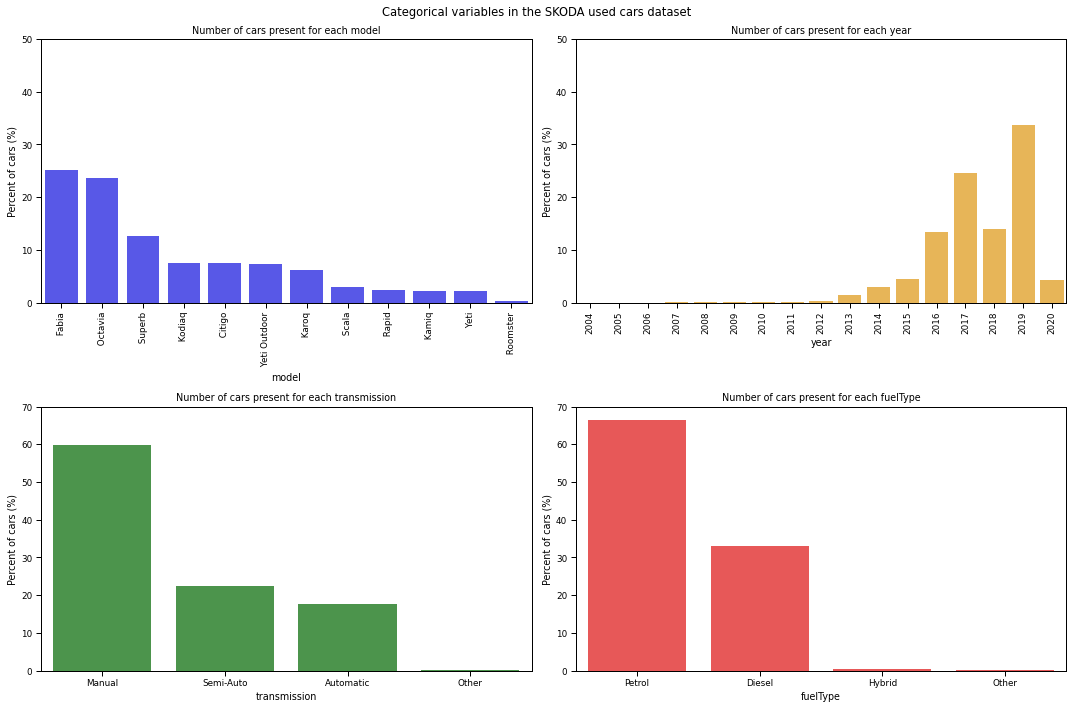

In [8]:
    sns.set_context('paper')

    plt.figure(figsize=(15,10))

    #(1,1)
    plt.subplot(2,2,1)
    barplot(model_count, 'model', 'blue', 90, np.arange(0,51,10))

    #(1,2)
    plt.subplot(2,2,2)
    barplot(year_count, 'year', 'orange', 90, np.arange(0,51,10))

    #(2,1)
    plt.subplot(2,2,3)
    barplot(transmission_count, 'transmission', 'green', 0, np.arange(0,71,10))

    #(2,2)
    plt.subplot(2,2,4)
    barplot(fuelType_count, 'fuelType', 'red', 0, np.arange(0,71,10))

    #title for all the plots
    plt.suptitle("Categorical variables in the SKODA used cars dataset")

    # individual plots  are separated
    plt.tight_layout()

    # display all the plots
    plt.show()


# Scatterplot and Trendline

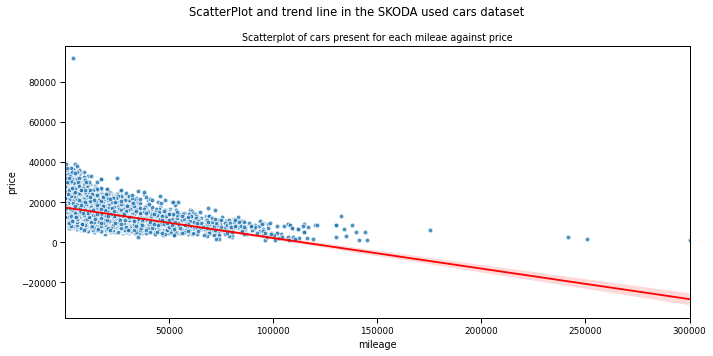

In [9]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 1, 1)
plt.title("Scatterplot of cars present for each mileae against price")

#here the scatterplot is drawn for mileage and price from df dataset 
#the scatter dot has white edge color and the trend line has red color
sns.regplot(x='mileage', y='price', data = df, scatter_kws= { 'edgecolor': 'white'} , line_kws= {'color': 'r'} )

plt.suptitle("ScatterPlot and trend line in the SKODA used cars dataset")

plt.tight_layout()
plt.show()

# Explanation (scatterplot and trendline)
The above scatterplot shows the relationship between the mileage and price of Skoda used car.

We can easily identify that the scatters are exponentially decreasing. The trendline shows the direction of the scatters. The treadline refers that the values are scattered round the line.



# Histogram

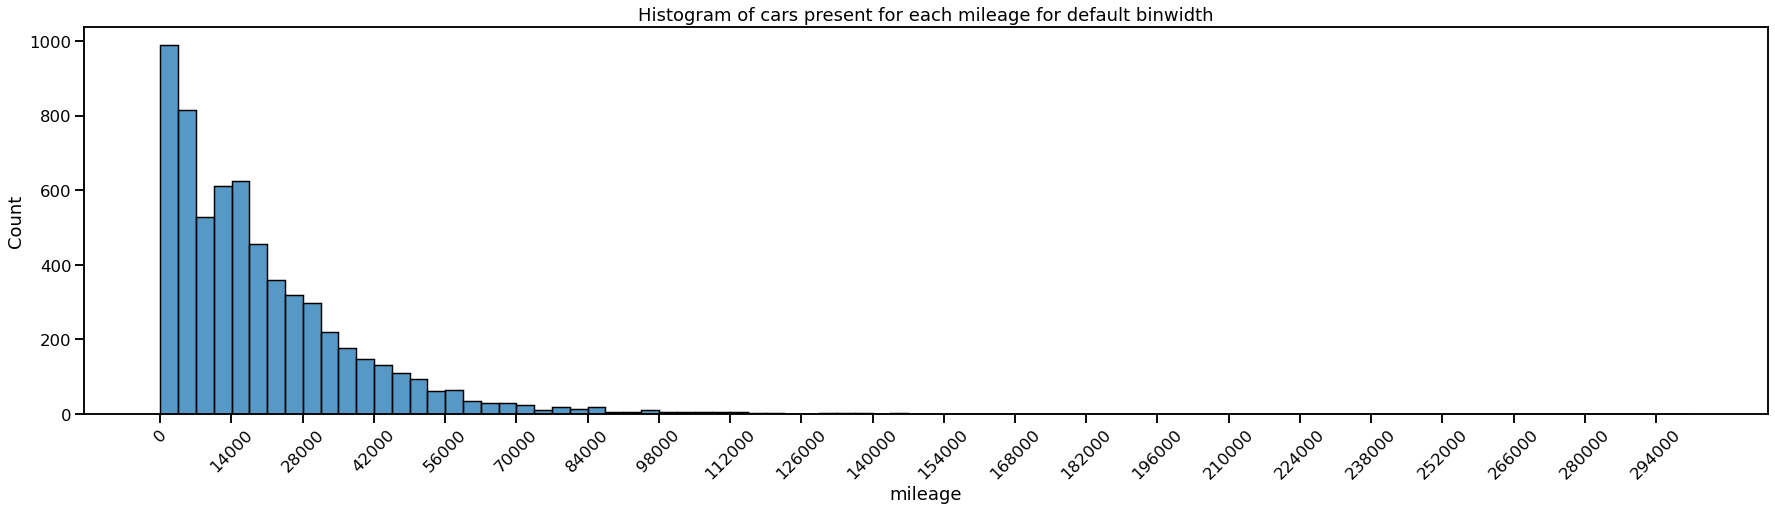

In [10]:
sns.set_context('talk')

plt.figure(figsize=(25, 20))

plt.subplot(3, 1, 1)
plt.title("Histogram of cars present for each mileage for default binwidth")

#binwidth is the duration for each bar in the histogram
sns.histplot(data=df, x='mileage', binwidth = 3500)#by default binwidth

#x axis value will be shown 7000 value apart from 0 to 3000000
#values are rotated at 45 degree angle
plt.xticks(np.arange(0, 300000, 14000), rotation=45)


plt.tight_layout()
plt.show()

# Explanation (Histogram)
The above histogram shows us the distribution of mileage of Skoda used car dataset.
The histogram is in positive skew and the squence of the 3 values is mode, median, mean.As it has only one peak, we can call it unimodal.


# Distribution plot

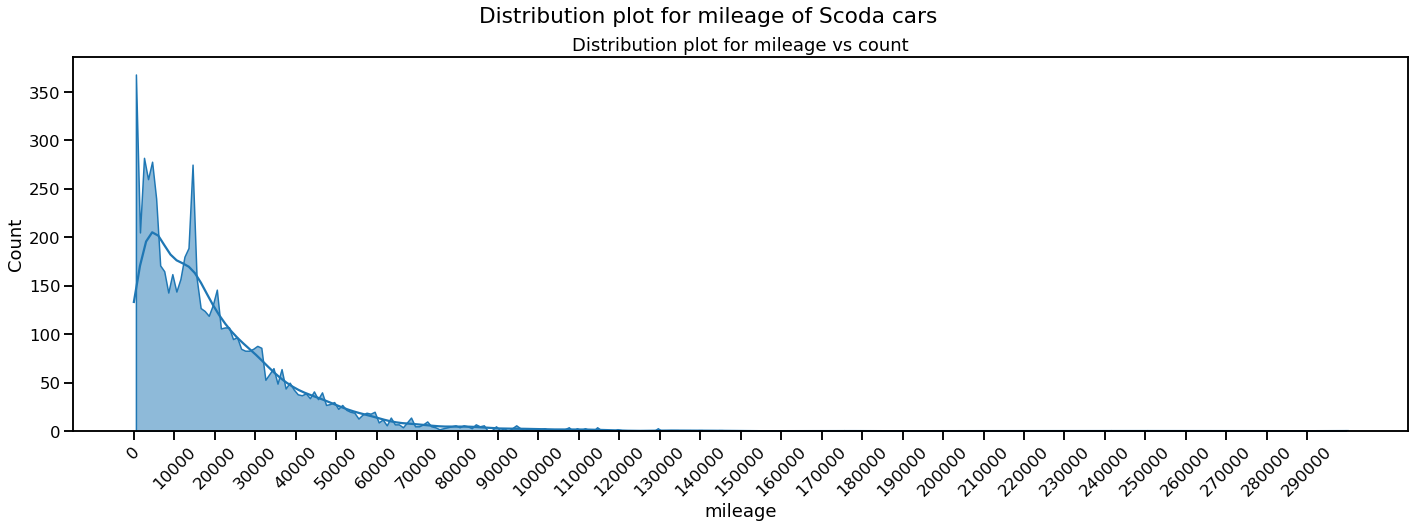

In [11]:
sns.set_context('talk')
plt.figure(figsize=(20, 20))

plt.subplot(3, 1, 1)
plt.title("Distribution plot for mileage vs count")

sns.histplot(data=df, x='mileage', binwidth = 1000,  kde = True ,element='poly')
plt.xticks(np.arange(0, 300000, 10000), rotation=45)

plt.suptitle("Distribution plot for mileage of Scoda cars")


plt.tight_layout()
plt.show()

# Explanation (Distribution plot)
The plot is drawn for the occurances for different values of mileage.
The above plot is positively skewed. The distribution plot shows us the approximate flow of the values in the histogram.


# ECDF Plot

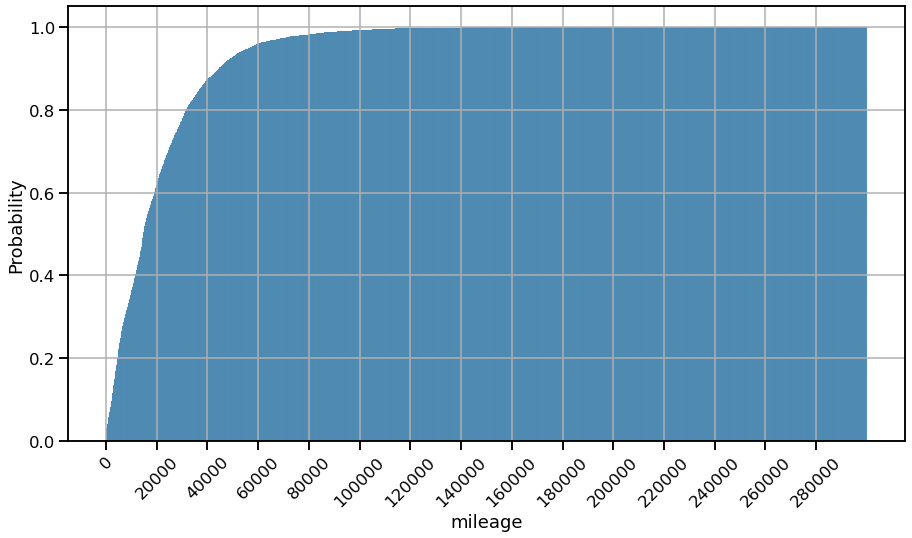

In [11]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 1, 1)
sns.histplot(data=df, x='mileage', binwidth = 100, cumulative = True, stat = 'probability')
plt.xticks(np.arange(0, 300000, 20000), rotation=45)
plt.grid()
plt.show()


# Explanation(ECDF Plot)
Here the plot is drawn for cummutative values of mileage of Skoda used car dataset. It shows us the probability of mileage. Specifically we can see that for 20000 mileage we get the probability approximately 0.6.


# Boxplot & Violinplot

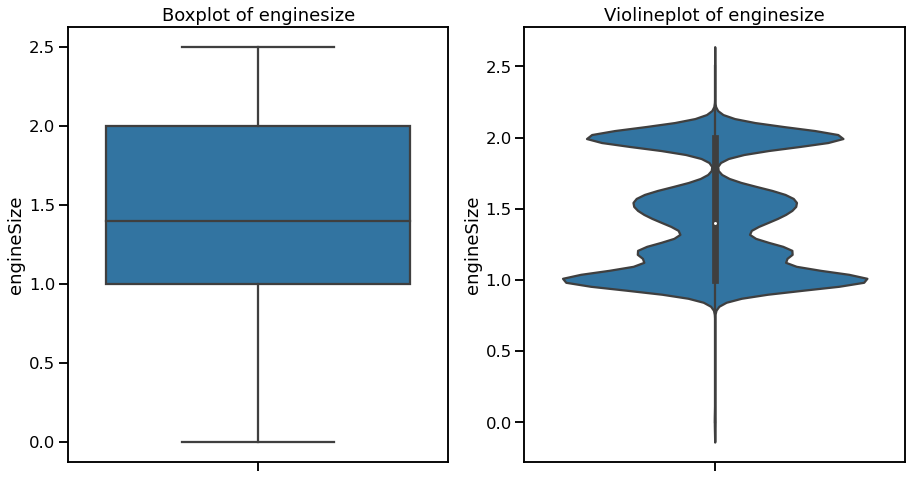

In [12]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("Boxplot of enginesize")
sns.boxplot(y="engineSize" , data = df, showfliers = False)
#plt.show()

plt.subplot(1, 2, 2)
plt.title("Violineplot of enginesize")
sns.violinplot(y="engineSize" , data = df, showfliers = False)
plt.show()

# Explanation (Box plot & Violinplot)
## Boxplot
The plot shows us the possibillity of the occurance of the values for enginesize of Skoda used car dataset.
Here first quartile is in 1.0, third quartile is in 2.0 and the median is in aproximately 1.4. 25% of data is in first quartile, 50% is in median and 75% is in third quartile. 
The values are in assending order.
Inter quartile range is 1.0.
The highest value is 2.5 and lowest value is 0.0.

## Violinplot
Here the narrow box in the middle of violineplot shows us the inter quartile range, the white dot represents median value. 
The occurances of different values of enginesize is easily visible here. The occurances of 1.0 is the higer than anyother values.


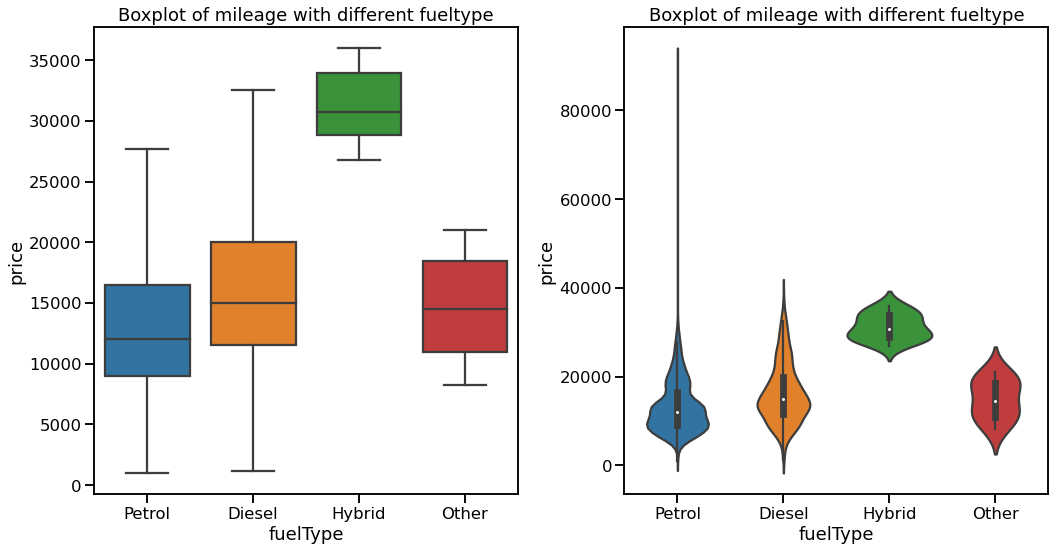

In [13]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title("Boxplot of mileage with different fueltype")
#showfliers mea
sns.boxplot(x='fuelType',  y="price" , data = df, showfliers = False)

plt.subplot(1, 2, 2)
plt.title("Boxplot of mileage with different fueltype")
sns.violinplot(x='fuelType', y="price" , data = df, showfliers = False)

plt.tight_layout()
plt.show()

# Explanation 
Here boxplot and violine plot has been drawn for price with different type of fuel.
We can compare the occurances for different type of fuel with price value of Skoda used car dataset.